## Part 0 : Setting up an IBM Quantum Account (Do this before the session!) 

1. Go to the <a href = "https://quantum-computing.ibm.com/">IBM Quantum login page. </a>
2. Click on “Create an IBMid”. This should take you to a new page
3. Under “Don’t have an account?” click the “Create an IBMid” button.
4. **Use your wisc emailID to signup**. This is to prevent an security issues you might encounter otherwise. Fill in the rest of the form and verify your email.

You should now be able to login at the IBM Quantum login page with your wisc emailID as your IBMid and the password you entered in the form.


# Part I: Introduction to Qiskit
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.
You can run the other following cells in the same way.

In [3]:
import numpy as np
from numpy import pi

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit.quantum_info.operators import Operator, Pauli

## I.1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html

It will help you to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates. 

By default, states in Qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises by applying the correct rotations. (Press Shift + Enter to run a code cell)
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$. 

<div>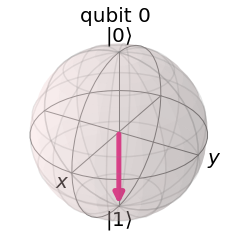</div>

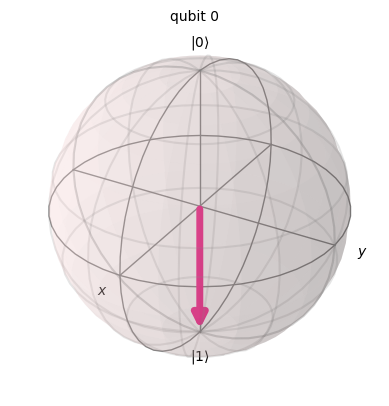

In [4]:
def bit_flip():
    qc = QuantumCircuit(1)
    #
    #apply the x-gate to the qubit 
    
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(bit_flip())
plot_bloch_multivector(state)


### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$
<div><img src="https://i.stack.imgur.com/dAiWj.png" width="200"></div>

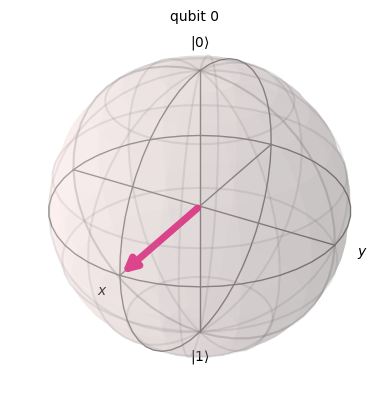

In [5]:
def plus_state():
    qc = QuantumCircuit(1)
    #
    # apply the hadamard rotation to the qubit
    
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(plus_state())
plot_bloch_multivector(state)

### 3.) Let's combine the two operations seen before. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 

<div>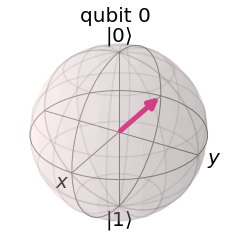</div>

Can you even come up with different ways?

In [1]:
def minus_state():
    qc = QuantumCircuit(1)
    #
    #apply the x and hadamard in a specific order to the qubit
    
    #
    #
    return qc

state = Statevector.from_instruction(minus_state())
plot_bloch_multivector(state)


Traceback (most recent call last):
  Cell In[1], line 10
    state = Statevector.from_instruction(minus_state())
NameError: name 'Statevector' is not defined

Use %tb to get the full traceback.


### 4.) Finally, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. 

<div>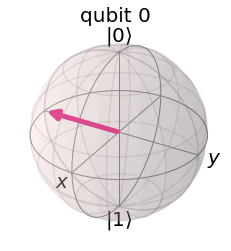</div>

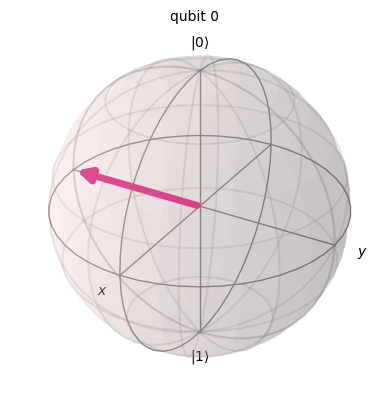

In [7]:
def minus_i_state():
    qc = QuantumCircuit(1)
    #apply the hadamard and SDG gate to the qubit
    
    # FILL YOUR CODE IN HERE
    #
    #
    return qc

state = Statevector.from_instruction(minus_i_state())
plot_bloch_multivector(state)

## I.2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://qiskit.org/textbook/ch-gates/introduction.html

The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate. The CNOT gate has no effect when applied on two qubits in state $|0\rangle$, but this changes if we apply a Hadamard gate before to the control qubit to bring it in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. There are four Bell states in total, so let's try to also construct another one:


### 5.) Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

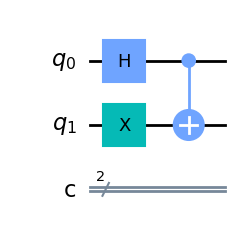

In [8]:
def psi_plus():
    # This time, we not only want two qubits, but also two classical bits for the measurement
    qc = QuantumCircuit(2,2) 
    
    
    # apply the hadamard gate to qubit 0 
    
    # apply the x-gate to qubit 1 
    
    # apply the c-x gate , with control qubit 0 and target qubit 1

    return qc

qc = psi_plus()
qc.draw() # we draw the circuit

Let us now also add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

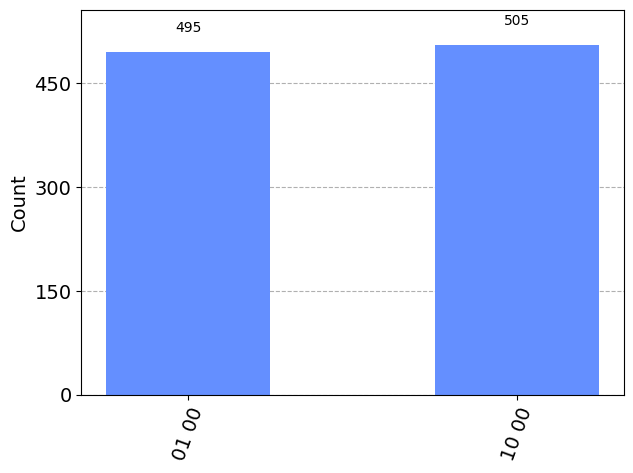

In [9]:
qc.measure_all() # we measure all the qubts
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

As you can see in the histogram, the only possible outputs are "01" and "10", so the states of the two qubits are always perfectly anti-correlated.

As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
- A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

<div>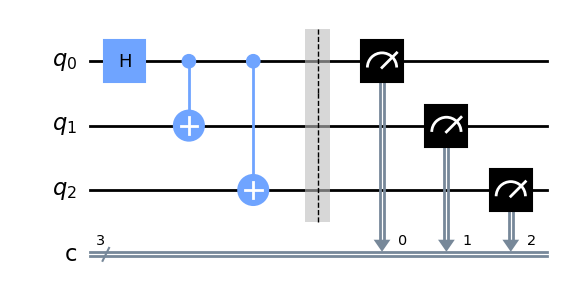</div>


<div class="alert alert-block alert-success">

### Exercise: Create a 3 qubit GHZ State and measure it.


</div>

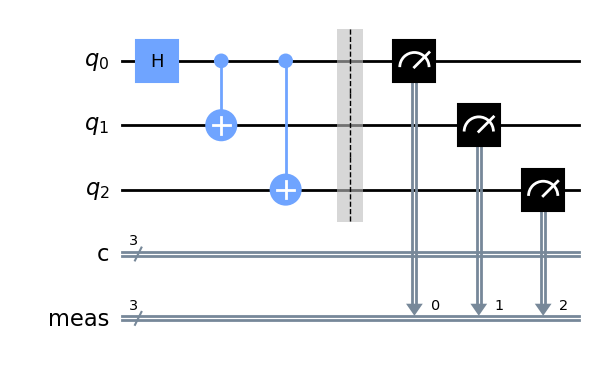

In [10]:
# Exercise: Recreate the circuit as shown above.
ghz = QuantumCircuit(3,3)
# Add a H gate on qubit 0, putting this qubit in superposition.

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.

# Measure qubits
ghz.measure_all()


# Draw the circuit
ghz.draw(output="mpl")


Total count for 000 and 111 are: {'111 000': 502, '000 000': 498}


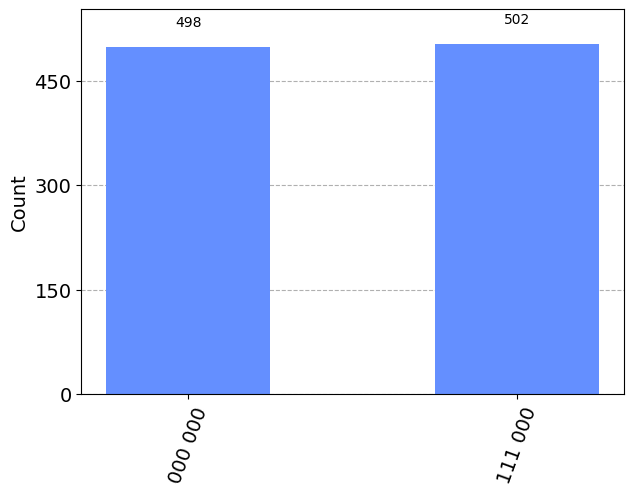

In [11]:
simulator = Aer.get_backend("aer_simulator")
compiled_circuit = transpile(ghz, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 000 and 111 are:",counts)

# Draw the circuit
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Measuring Quantum states

As explained in the **WQCC - Introduction to Quantum Computing Session**, you can find the probability of measurement outcomes by taking the absolute value squared of the entries of a quantum state vector.

For example, when measuring the + state:  

$ |+\rangle = \frac{1}{\sqrt2}|0\rangle + \frac{1}{\sqrt2}|1\rangle $

The probability of measuring 0 or 1 is given by the following:

$ Pr(0) = |\frac{1}{\sqrt2}|^2 = \frac{1}{2}$  
$ Pr(1) = |\frac{1}{\sqrt2}|^2 = \frac{1}{2}$

Let's create a $|+\rangle$ using the `Statevector` class:

In [12]:
# create the state-vector for
# the quantum superposition state |+>
plus_state = Statevector.from_label("+")

# convert the state-vector created before to latex
plus_state.draw("latex")

<IPython.core.display.Latex object>

In [13]:
# show the state-vector |+> created before
plus_state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Now we can get the probability of measuring 0 or 1:

In [14]:
# show the probabilities of the possible
# classical outcomes/states resulting 
# from measuring the quantum superposition state |+>
plus_state.probabilities_dict()

{'0': 0.4999999999999999, '1': 0.4999999999999999}

The dictionary object above shows you all the possible measurement outcomes and what the probability is of getting them. The actual act of measuring forces the state to collapse into either the 0 or 1 state:

In [15]:
# run this cell multiple times to show collapsing
# into one state or the other (i.e., 0 or 1)

# for a number of trials equal to 5
for _ in range(5):
    
    # measure the quantum superposition state |+>
    res = plus_state.measure()
    
    # print the result of the measurement of
    # the quantum superposition state |+>
    print(res)

('0', Statevector([1.+0.j, 0.+0.j],
            dims=(2,)))
('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
('1', Statevector([0.+0.j, 1.+0.j],
            dims=(2,)))
('0', Statevector([1.+0.j, 0.+0.j],
            dims=(2,)))
('0', Statevector([1.+0.j, 0.+0.j],
            dims=(2,)))


We can implement the same $|+\rangle$ state with measurement using a quantum circuit:

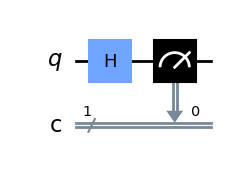

In [16]:
# create a quantum circuit for one qubit and one bit,
# to implement a |+> quantum superposition state
qc = QuantumCircuit(1, 1)

# apply a Hadamard gate to
# the quantum circuit, on the 0 qubit
qc.h(0)

# measure the 0 qubit of the quantum circuit
# to the respective 1st bit of the same
qc.measure(0, 0)

# draw the quantum circuit for one qubit and one bit,
# implementing a |+> quantum superposition state
qc.draw(output="mpl")

If we ran this circuit using a simulator we would get the same results as we did with the statevector class.

We can now also measure this circuit the same way we did before.

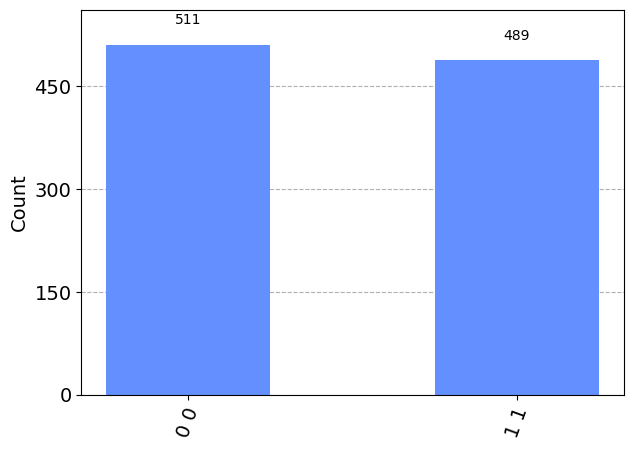

In [17]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

In [18]:
counts

{'1 1': 489, '0 0': 511}

## Part 2 : Application of Quantum Circuits

In the next following cells, we will implement the <a href = "https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform" > Quantum Fourier Transform (QFT)</a> which forms the basis for many useful algorithms in quantum computing. 

In Mathematics, the Fourier Transform can help transform **Amplitude vs Time** graph --> **Amplitude vs Frequency** graphs

Here is a great resource for QFT on 2-qubits : https://young.physics.ucsc.edu/150/QFT-FFT.pdf

Essentially, QFT transforms between two bases, the computational (Z) basis, and the Fourier basis.



[The Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) occurs in many different formats throughout classical computing, in areas ranging from signal processing to data compression to complexity theory. The quantum Fourier transform (QFT) is the quantum implementation of the discrete Fourier transform over the amplitudes of a wavefunction. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation. You'll learn more about this important implementation later on during the Summer School, but for this final challenge of Lab 1 we would like you to use Qiskit to create the following QFT circuit on 2 qubits:

<div><img src="https://raw.githubusercontent.com/rubenandrebarreiro/ibm-qiskit-global-summer-school-2023/6d6630ca08f213e1b06232109f1af047d750261f/labs/jupyter-notebooks/resources/quantum-fourier-transform.png"></div>

<div class="alert alert-block alert-success"> Exercise: Create a two-qubit QFT circuit using IBM's Qiskit. </div>

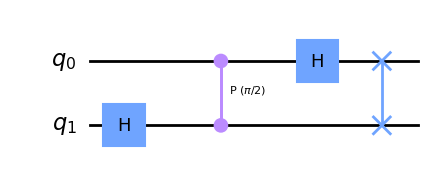

In [19]:
# create a quantum circuit for two qubits,
# to implement a quantum fourier transform
qft = QuantumCircuit(2)

##############################

# add gates to your quantum circuit here

# apply an Hadamard gate to
# the quantum circuit, on qubit 1 
# fill this out 


# apply a Controlled-Phase (.cp) gate to
# the quantum circuit acccording to
# a theta angle, with control on
# the 1st qubit and target on the 2nd qubit
# fill this out 


# apply an Hadamard gate to
# the quantum circuit, on the 1st qubit
# fill this out 


# apply a SWAP gate to
# the quantum circuit,
# between the 1st qubit
# and the 2nd qubit
qft.swap(0, 1)

##############################

# draw the quantum circuit for two qubits,
# implementing a quntum fourier transform
qft.draw(output="mpl")

To see the matrix that describes the action of this circuit, we can plug the circuit into the `Operator` function like this:

In [20]:
# create an operator U from the quantum circuit of
# the quantum fourier transform created before
U = Operator(qft)

# convert the quantum operator U representing
# the quantum circuit created before to latex
array_to_latex(U)

<IPython.core.display.Latex object>

# Real Hardware 🎉

In [21]:
# from qiskit.tools.jupyter import *
# %qiskit_backend_overview

In [22]:
# from qiskit_ibm_provider import IBMProvider, least_busy
# # Save account credentials if this is your first time running it.
# # IBMProvider.save_account(token="", overwrite=True)

# # Load previously saved account credentials.
# provider = IBMProvider(instance='ibm-q/open/main')

# # Get the least-busy backend 
# least_busy_device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 1 and
#                                    not b.configuration().simulator and b.status().operational==True))

# print("The least busy backend currently is " + least_busy_device.name)

# least_busy_device

The least busy backend currently is ibm_brisbane


<IBMBackend('ibm_brisbane')>

In [23]:
#Transpile for real device
# bell_circ_real = transpile(bell, least_busy_device)
# job = least_busy_device.run(bell_circ_real)

# # Monitoring our job
# from qiskit_ibm_provider.job import job_monitor
# print(f"Job ID: {job.job_id()}")
# job_monitor(job)

In [24]:
# # Run and get counts
# counts_real = job.result.get_counts(bell_circ_real)
# print(counts_real)

(See Lab jobs tab for job progress)

In [25]:
# your_provider = IBMProvider(instance='your-hub-name/your-group-name/your-project-name')

# your_backend = your_provider.get_backend('ibmq_montreal')

# your_result = your_backend.run(bell_circ_real).result()

# counts_real = result.get_counts(bell_circ_real)

Qiskit is backend agnostic!

In [26]:
# !pip install qiskit-ionq

# from qiskit_ionq import IonQProvider
# provider = IonQProvider()

# ionq_backend = provider.get_backend("ionq_qpu")
# job = ionq_backend.run(bell)

# plot_histogram(job.get_counts())

In [28]:
# Some of the examples used in this notebook has been provided by IBM for the WQCC Qiskit Fall Fest 2023. Here is the required qiskit version information and copyright notice  

import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright